In [1]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [2]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", "3.0.0")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [3]:
dataset


DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [4]:
# Print 10 articles and highlights
for i in range(10):
    article = dataset['train'][i]['article']
    highlights = dataset['train'][i]['highlights']
    print(f"Article {i+1}:")
    print(f"Article: {article}")
    print(f"Highlights: {highlights}")


Article 1:
Article: LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office c

In [5]:
event_topics = ['politics', 'crime', 'sports', 'travel', 'health']

In [11]:

def extract_event_paragraphs(paragraphs, topic):
    keywords = {
        'politics': ['government', 'election', 'policy', 'president', 'senate', 'congress'],
        'crime': ['murder', 'theft', 'arrest', 'crime', 'police', 'investigation'],
        'sports': ['game', 'team', 'player', 'match', 'tournament', 'score'],
        'travel': ['trip', 'vacation', 'destination', 'tourist', 'flight', 'hotel'],
        'health': ['disease', 'medicine', 'hospital', 'doctor', 'treatment', 'vaccine']
    }

    relevant_paragraphs = []
    for paragraph in paragraphs:
        article_text = paragraph['article']
        for keyword in keywords[topic]:
            if keyword in article_text:
                relevant_paragraphs.append(paragraph)
                break
    return relevant_paragraphs

In [12]:

for topic in event_topics:
    relevant_paragraphs = extract_event_paragraphs(dataset['train'], topic)
    print(f"Extracted {len(relevant_paragraphs)} paragraphs related to {topic}")

Extracted 81230 paragraphs related to politics
Extracted 96682 paragraphs related to crime
Extracted 99907 paragraphs related to sports
Extracted 59652 paragraphs related to travel
Extracted 61993 paragraphs related to health


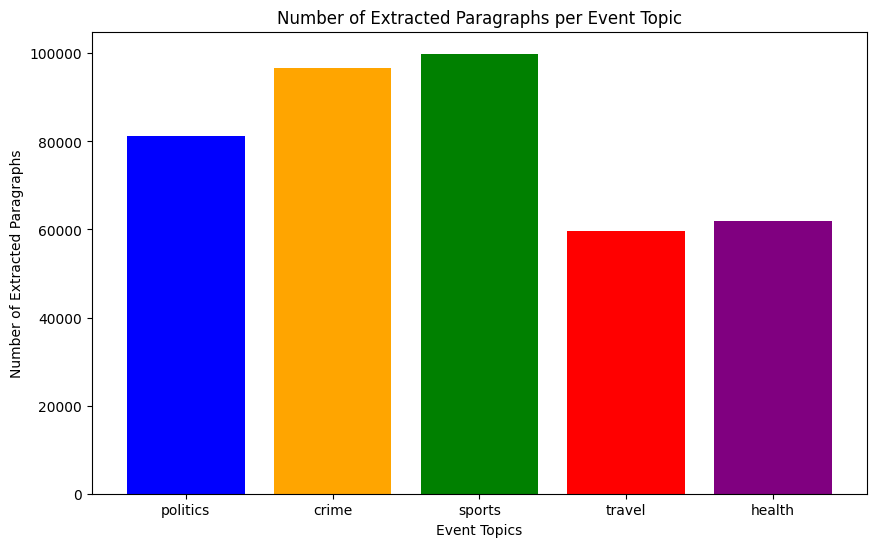

In [13]:
import matplotlib.pyplot as plt

# Data to plot
topics = ['politics', 'crime', 'sports', 'travel', 'health']
paragraph_counts = [81230, 96682, 99907, 59652, 61993]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(topics, paragraph_counts, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Event Topics')
plt.ylabel('Number of Extracted Paragraphs')
plt.title('Number of Extracted Paragraphs per Event Topic')
plt.show()


In [16]:
import spacy

nlp = spacy.load('en_core_web_sm')

def extract_event_components(paragraph):
    doc = nlp(paragraph['article'])
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    objects = [entity for entity in entities if entity[1] in ['OBJECT', 'PRODUCT']]
    agents = [entity for entity in entities if entity[1] in ['PERSON', 'ORGANIZATION']]
    timespan = [entity for entity in entities if entity[1] == 'DATE']
    geolocation_span = [entity for entity in entities if entity[1] == 'GPE']
    background = [token.text for token in doc if token.pos_ == 'NOUN' and token not in objects + agents]
    return {
        'background': background,
        'objects': objects,
        'agents': agents,
        'timespan': timespan,
        'geolocation_span': geolocation_span
    }

for topic in event_topics:
    relevant_paragraphs = extract_event_paragraphs(dataset['train'], topic)
    for paragraph in relevant_paragraphs:
        event_components = extract_event_components(paragraph)
        print(f"Event components for paragraph: {event_components}")

Event components for paragraph: {'background': ['note', 'series', 'correspondents', 'experiences', 'news', 'stories', 'events', 'users', 'jail', 'inmates', 'inmate', 'floor', 'inmates', 'trial', 'floor', 'detention', 'facility', 'floor', 'illnesses', 'court', 'drug', 'charges', 'charges', 'officer', 'felonies', 'arrests', 'confrontations', 'police', 'people', 'police', 'scene', 'confrontation', 'illness', 'directions', 'floor', 'help', 'jail', 'jail', 'advocate', 'justice', 'arms', 'guards', 'permission', 'videotape', 'floor', 'floor', '»', 'people', 'prisoners', 'robes', 'holes', 'arms', 'feet', 'wool', 'bag', 'patients', 'shoes', 'laces', 'mattresses', 'third', 'people', 'county', 'jails', 'volume', 'system', 'result', 'floor', 'jail', 'lights', 'glare', 'cells', 'men', 'robes', 'cells', 'son', 'president', 'man', 'help', 'way', 'prisoner', 'patients', 'system', 'hospital', 'jail', 'charges', 'mind', 'advocate', 'things', 'meal', 'things', 'way', 'patients', 'years', 'people', 'lunat

KeyboardInterrupt: 

In [14]:
advanced_keywords = {
    'politics': ['government', 'election', 'policy', 'president', 'senate', 'congress'],
    'crime': ['murder', 'theft', 'arrest', 'crime', 'police', 'investigation'],
    'sports': ['game', 'team', 'player', 'match', 'tournament', 'score'],
    'travel': ['trip', 'vacation', 'destination', 'tourist', 'flight', 'hotel'],
    'health': ['disease', 'medicine', 'hospital', 'doctor', 'treatment', 'vaccine']
}


In [26]:
from datasets import load_dataset
from wordcloud import WordCloud
import matplotlib.pyplot as plt



event_topics = ['politics', 'crime', 'sports', 'travel', 'health']

def extract_event_paragraphs(paragraphs, topic):
  relevant_paragraphs = []
  for paragraph in paragraphs:
        article_text = paragraph['article']
        for keyword in advanced_keywords[topic]:
            if keyword in article_text:
                relevant_paragraphs.append(article_text)
                break
  return relevant_paragraphs




def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


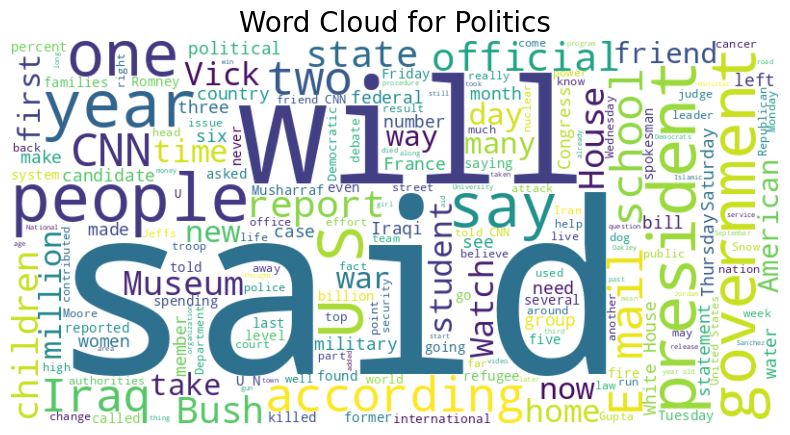

<Figure size 640x480 with 0 Axes>

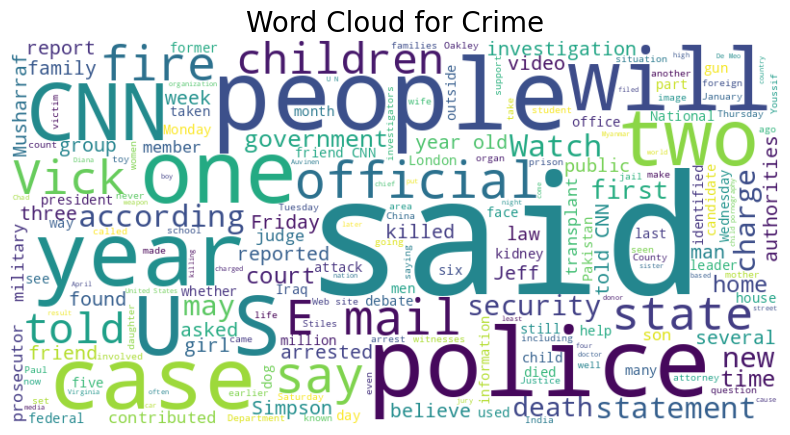

<Figure size 640x480 with 0 Axes>

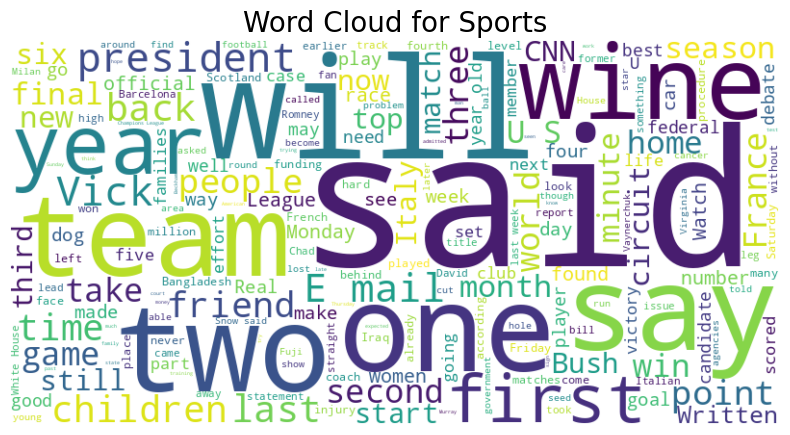

<Figure size 640x480 with 0 Axes>

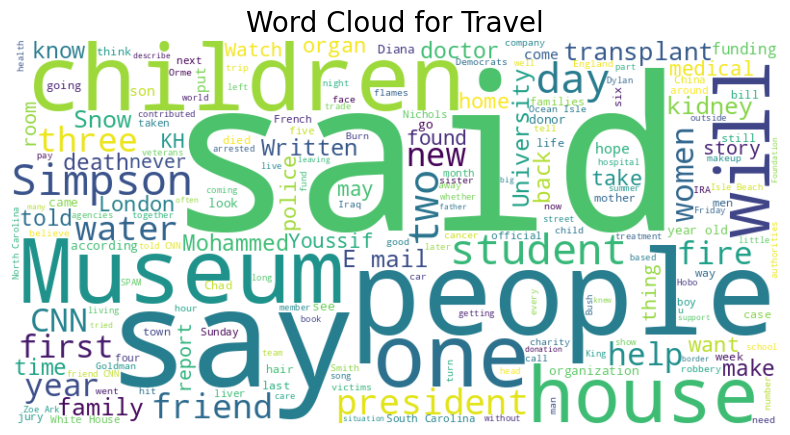

<Figure size 640x480 with 0 Axes>

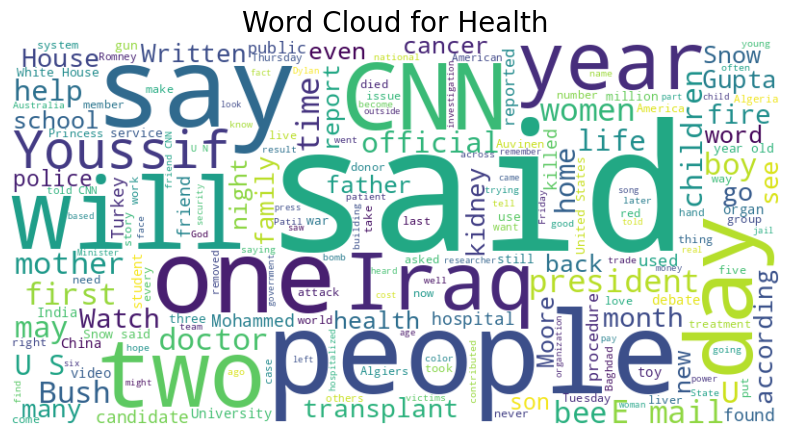

<Figure size 640x480 with 0 Axes>

In [29]:

for topic in event_topics:
    all_paragraphs = []
    for i in range(100):  # Process a subset of articles for illustration
        article = dataset['train'][i]['article']
        relevant_paragraphs = extract_event_paragraphs([{'article': article}], topic)
        all_paragraphs.extend(relevant_paragraphs)
    combined_text = ' '.join(all_paragraphs)
    generate_word_cloud(combined_text, f'Word Cloud for {topic.title()}')
    plt.tight_layout()
    plt.show()